Your task is to implement a classification algorithm using the Euclidean distance metric to predict the class of a given iris sample.


Load the Iris dataset and split it into a training set and a testing set. The testing set should contain the first 3 samples of each class. Do NOT use the inbuilt function for splitting the data.


Plot all the training samples using scatter plot and write the inferences.


For each sample in the testing set, compute its Euclidean distance to all samples in the training set.


Identify the K-nearest neighbors with the smallest Euclidean distances for each sample in the testing set, where K is a hyperparameter.


Determine the majority class among the K-nearest neighbors and assign it as the predicted class for the sample.


Evaluate the accuracy of your classifier on the testing set and report the results.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "/content/drive/MyDrive/PRML/LAB_2/iris.csv"
df = pd.read_csv(path)
df = pd.read_csv(path)
print(df.head(5))
print(df.info())
df.isnull().sum()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

split it into a training set and a testing set. The testing set should contain the first 3 samples of each class. Do NOT use the inbuilt function for splitting the data.

In [77]:

num_C1 = 3
num_C2 = 3
num_C3 = 3
Test = pd.DataFrame()
print(Test)
for ind,row in df.iterrows():
  if row.Species == 'Iris-setosa' and num_C1 > 0:
    Test = Test.append(row, ignore_index = True)
    num_C1 = num_C1 - 1
  elif row.Species == 'Iris-versicolor' and num_C2 > 0:
    Test = Test.append(row, ignore_index = True)
    num_C2 = num_C2 - 1
  elif row.Species == 'Iris-virginica' and num_C3 > 0:
    Test = Test.append(row, ignore_index = True)
    num_C3 = num_C3 - 1

print(Test)

for ind,row in df.iterrows():
  for id,rows in Test.iterrows():
    if row.Id == rows.Id:
      df.drop(df[df['Id'] == row.Id].index, inplace = True)

print(df.info())


Empty DataFrame
Columns: []
Index: []
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0    4            4.6           3.1            1.5           0.2   
1    5            5.0           3.6            1.4           0.2   
2    6            5.4           3.9            1.7           0.4   
3   54            5.5           2.3            4.0           1.3   
4   55            6.5           2.8            4.6           1.5   
5   56            5.7           2.8            4.5           1.3   
6  104            6.3           2.9            5.6           1.8   
7  105            6.5           3.0            5.8           2.2   
8  106            7.6           3.0            6.6           2.1   

           Species  
0      Iris-setosa  
1      Iris-setosa  
2      Iris-setosa  
3  Iris-versicolor  
4  Iris-versicolor  
5  Iris-versicolor  
6   Iris-virginica  
7   Iris-virginica  
8   Iris-virginica  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 6 to 149

<ipython-input-77-9a29bd88d0be>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Test = Test.append(row, ignore_index = True)
<ipython-input-77-9a29bd88d0be>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Test = Test.append(row, ignore_index = True)
<ipython-input-77-9a29bd88d0be>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Test = Test.append(row, ignore_index = True)


Plot all the training samples using scatter plot and write the inferences.

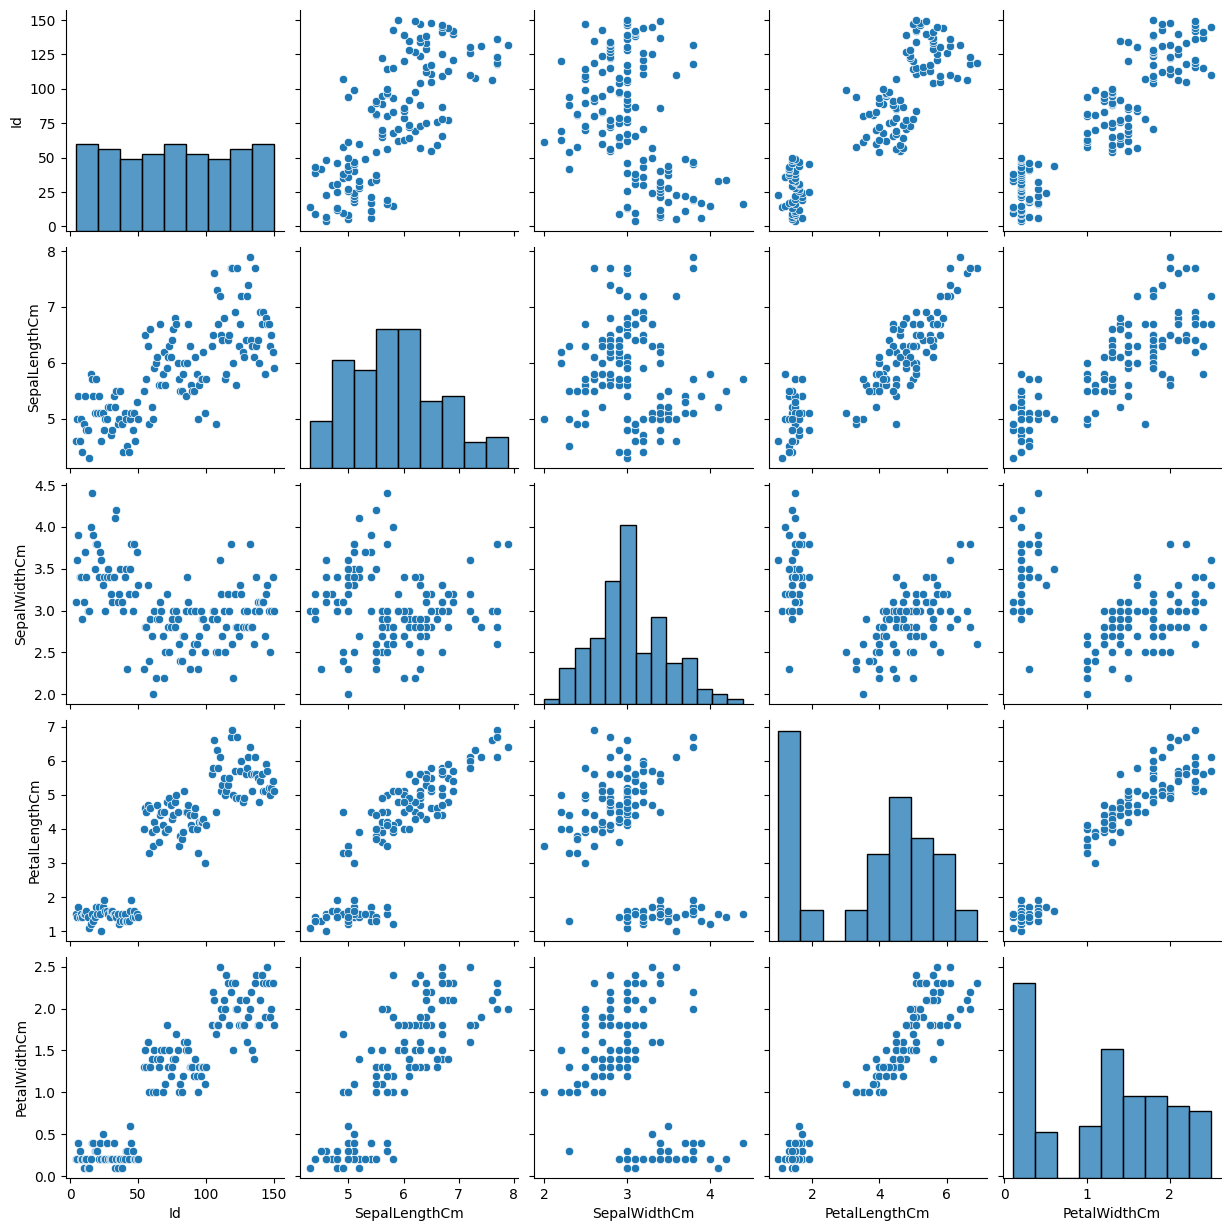

In [5]:
sns.pairplot(data = df)

    

1.   Sepal Length vs. Sepal Width: The scatter plot shows points scattered across the plot without a clear pattern. This indicates that sepal length and width are not strongly correlated.

2. Sepal Length vs. Petal Length: We can see a roughly linear upward trend in the scatter plot, it suggests that as sepal length increases, petal length tends to increase as well. This indicates a positive correlation between these two variables.

3. Sepal Length vs. Petal Width: Similar to the previous case, this plot has an upward trend suggesting a positive correlation between sepal length and petal width.

4. Sepal Width vs. Petal Length: The plot does not show a strong pattern, indicating that sepal width and petal length might not have a strong linear relationship.

5. Sepal Width vs. Petal Width: a slightly upward trend in the scatter plot can be seen, implying a positive correlation between sepal width and petal width.

6. Petal Length vs. Petal Width: A clear upward trend in the scatter plot can be seen suggesting a positive correlation between petal length and width. This relationship might indicate that larger petals are also wider.

For each sample in the testing set, compute its Euclidean distance to all samples in the training set.

##2 dimensions

In [6]:
#df = df.drop(columns=['column_nameA', 'column_nameB'])
two_dim_df = df.drop(columns = ['PetalLengthCm' , 'PetalWidthCm'])
two_dim_test = Test.drop(columns = ['PetalLengthCm', 'PetalWidthCm'])
print(two_dim_df.head())
print(two_dim_test.head())

   Id  SepalLengthCm  SepalWidthCm      Species
3   4            4.6           3.1  Iris-setosa
4   5            5.0           3.6  Iris-setosa
5   6            5.4           3.9  Iris-setosa
6   7            4.6           3.4  Iris-setosa
7   8            5.0           3.4  Iris-setosa
   Id  SepalLengthCm  SepalWidthCm          Species
0   1            5.1           3.5      Iris-setosa
1   2            4.9           3.0      Iris-setosa
2   3            4.7           3.2      Iris-setosa
3  51            7.0           3.2  Iris-versicolor
4  52            6.4           3.2  Iris-versicolor


**Prediction**:

In [79]:
test_1 = two_dim_test.iloc[[0]]
ground_truth = test_1.Species
predict_test_case_1 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in two_dim_df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_1.SepalLengthCm)**2 + (row.SepalWidthCm - test_1.SepalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_1 = pd.concat([predict_test_case_1, new_row], ignore_index=True)

print(predict_test_case_1.head())
print(predict_test_case_1.info())
#the distance is in object type so convert to float
predict_test_case_1['Distance'] = predict_test_case_1['Distance'].astype(float)
print(predict_test_case_1.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_1 = predict_test_case_1.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df = pd.DataFrame()

def pred(k, plot_df):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_1.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_1.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_1.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth[0] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df = pd.concat([plot_df, new_row_1], ignore_index = True)
  return plot_df


#comparing the predicted class against ground truth of the test


for i in range(3,140,2):
  plot_df = pred(i,plot_df)
print("******************************************************")
print(plot_df.head())
print("******************************************************")

   Id                      Distance      Species
0   4  0    0.640312
dtype: float64  Iris-setosa
1   5  0    0.141421
dtype: float64  Iris-setosa
2   6       0    0.5
dtype: float64  Iris-setosa
3   7  0    0.509902
dtype: float64  Iris-setosa
4   8  0    0.141421
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        141 non-null    int64 
 1   Distance  141 non-null    object
 2   Species   141 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        141 non-null    int64  
 1   Distance  141 non-null    float64
 2   Species   141 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+

In [82]:
#X.iloc[0, 6]
test_2 = two_dim_test.iloc[[1]]
ground_truth_2 = test_2.Species
predict_test_case_2 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in two_dim_df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_2.SepalLengthCm)**2 + (row.SepalWidthCm - test_2.SepalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_2 = pd.concat([predict_test_case_2, new_row], ignore_index=True)

print(predict_test_case_2.head())
print(predict_test_case_2.info())
#the distance is in object type so convert to float
predict_test_case_2['Distance'] = predict_test_case_2['Distance'].astype(float)
print(predict_test_case_2.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_2 = predict_test_case_2.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_2 = pd.DataFrame()
def pred(k, plot_df_2):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_1.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_1.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_1.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth_2[1] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_2 = pd.concat([plot_df_2, new_row_1], ignore_index = True)

  return plot_df_2


#comparing the predicted class against ground truth of the test


for i in range(3,140,2):
  plot_df_2 = pred(i,plot_df_2)
print("******************************************************")
print(plot_df_2.head())
print("******************************************************")

   Id                      Distance      Species
0   4  1    0.316228
dtype: float64  Iris-setosa
1   5  1    0.608276
dtype: float64  Iris-setosa
2   6  1    1.029563
dtype: float64  Iris-setosa
3   7       1    0.5
dtype: float64  Iris-setosa
4   8  1    0.412311
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        141 non-null    int64 
 1   Distance  141 non-null    object
 2   Species   141 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        141 non-null    int64  
 1   Distance  141 non-null    float64
 2   Species   141 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+

In [89]:
test_3 = two_dim_test.iloc[[2]]
ground_truth_3 = test_3.Species
predict_test_case_3 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in two_dim_df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_3.SepalLengthCm)**2 + (row.SepalWidthCm - test_3.SepalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_3 = pd.concat([predict_test_case_3, new_row], ignore_index=True)

print(predict_test_case_3.head())
print(predict_test_case_3.info())
#the distance is in object type so convert to float
predict_test_case_3['Distance'] = predict_test_case_3['Distance'].astype(float)
print(predict_test_case_3.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_3 = predict_test_case_3.sort_values('Distance')


#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_3 = pd.DataFrame()
def pred(k, plot_df_3):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_3.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_3.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_3.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth_3[2] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_3 = pd.concat([plot_df_3, new_row_1], ignore_index = True)

  return plot_df_3


#comparing the predicted class against ground truth of the test


for i in range(3,140,2):
  plot_df_3 = pred(i,plot_df_3)
print("******************************************************")
print(plot_df_3.head())
print("******************************************************")

   Id                      Distance      Species
0   4  2    0.141421
dtype: float64  Iris-setosa
1   5       2    0.5
dtype: float64  Iris-setosa
2   6  2    0.989949
dtype: float64  Iris-setosa
3   7  2    0.223607
dtype: float64  Iris-setosa
4   8  2    0.360555
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        141 non-null    int64 
 1   Distance  141 non-null    object
 2   Species   141 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        141 non-null    int64  
 1   Distance  141 non-null    float64
 2   Species   141 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+

In [90]:
test_4 = two_dim_test.iloc[[3]]
ground_truth_4 = test_4.Species
predict_test_case_4 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in two_dim_df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_4.SepalLengthCm)**2 + (row.SepalWidthCm - test_4.SepalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_4 = pd.concat([predict_test_case_4, new_row], ignore_index=True)

print(predict_test_case_4.head())
print(predict_test_case_4.info())
#the distance is in object type so convert to float
predict_test_case_4['Distance'] = predict_test_case_4['Distance'].astype(float)
print(predict_test_case_4.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_4 = predict_test_case_4.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_4 = pd.DataFrame()
def pred(k, plot_df_4):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_4.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_4.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_4.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth_4[3] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_4 = pd.concat([plot_df_4, new_row_1], ignore_index = True)

  return plot_df_4


#comparing the predicted class against ground truth of the test


for i in range(3,140,2):
  plot_df_4 = pred(i,plot_df_4)
print("******************************************************")
print(plot_df_4.head())
print("******************************************************")

   Id                      Distance      Species
0   4  3    2.402082
dtype: float64  Iris-setosa
1   5  3    2.039608
dtype: float64  Iris-setosa
2   6  3    1.746425
dtype: float64  Iris-setosa
3   7  3    2.408319
dtype: float64  Iris-setosa
4   8  3    2.009975
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        141 non-null    int64 
 1   Distance  141 non-null    object
 2   Species   141 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        141 non-null    int64  
 1   Distance  141 non-null    float64
 2   Species   141 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+

In [91]:
test_5 = two_dim_test.iloc[[4]]
ground_truth_5 = test_5.Species
predict_test_case_5 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in two_dim_df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_5.SepalLengthCm)**2 + (row.SepalWidthCm - test_5.SepalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_5 = pd.concat([predict_test_case_5, new_row], ignore_index=True)

print(predict_test_case_5.head())
print(predict_test_case_5.info())
#the distance is in object type so convert to float
predict_test_case_5['Distance'] = predict_test_case_5['Distance'].astype(float)
print(predict_test_case_5.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_5 = predict_test_case_5.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_5 = pd.DataFrame()
def pred(k, plot_df_5):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_5.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_5.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_5.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth_5[4] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_5 = pd.concat([plot_df_5, new_row_1], ignore_index = True)

  return plot_df_5


#comparing the predicted class against ground truth of the test


for i in range(3,140,2):
  plot_df_5 = pred(i,plot_df_5)
print("******************************************************")
print(plot_df_5.head())
print("******************************************************")

   Id                      Distance      Species
0   4  4    1.802776
dtype: float64  Iris-setosa
1   5  4    1.456022
dtype: float64  Iris-setosa
2   6  4    1.220656
dtype: float64  Iris-setosa
3   7  4    1.811077
dtype: float64  Iris-setosa
4   8  4    1.414214
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        141 non-null    int64 
 1   Distance  141 non-null    object
 2   Species   141 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        141 non-null    int64  
 1   Distance  141 non-null    float64
 2   Species   141 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+

In [92]:
test_6 = two_dim_test.iloc[[5]]
ground_truth_6 = test_6.Species
predict_test_case_6 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in two_dim_df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_6.SepalLengthCm)**2 + (row.SepalWidthCm - test_6.SepalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_6 = pd.concat([predict_test_case_6, new_row], ignore_index=True)

print(predict_test_case_6.head())
print(predict_test_case_6.info())
#the distance is in object type so convert to float
predict_test_case_6['Distance'] = predict_test_case_6['Distance'].astype(float)
print(predict_test_case_6.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_6 = predict_test_case_5.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_6 = pd.DataFrame()
def pred(k, plot_df_6):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_6.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_6.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_6.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth_6[5] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_6 = pd.concat([plot_df_6, new_row_1], ignore_index = True)

  return plot_df_6


#comparing the predicted class against ground truth of the test


for i in range(3,140,2):
  plot_df_6 = pred(i,plot_df_6)
print("******************************************************")
print(plot_df_6.head())
print("******************************************************")

   Id                      Distance      Species
0   4       5    2.3
dtype: float64  Iris-setosa
1   5  5    1.964688
dtype: float64  Iris-setosa
2   6       5    1.7
dtype: float64  Iris-setosa
3   7  5    2.319483
dtype: float64  Iris-setosa
4   8  5    1.923538
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        141 non-null    int64 
 1   Distance  141 non-null    object
 2   Species   141 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        141 non-null    int64  
 1   Distance  141 non-null    float64
 2   Species   141 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+

In [93]:
test_7 = two_dim_test.iloc[[6]]
ground_truth_7 = test_7.Species
predict_test_case_7 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in two_dim_df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_7.SepalLengthCm)**2 + (row.SepalWidthCm - test_7.SepalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_7 = pd.concat([predict_test_case_7, new_row], ignore_index=True)

print(predict_test_case_7.head())
print(predict_test_case_7.info())
#the distance is in object type so convert to float
predict_test_case_7['Distance'] = predict_test_case_7['Distance'].astype(float)
print(predict_test_case_7.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_7 = predict_test_case_7.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_7 = pd.DataFrame()
def pred(k, plot_df_7):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_7.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_7.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_7.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth_7[6] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_7 = pd.concat([plot_df_7, new_row_1], ignore_index = True)

  return plot_df_7


#comparing the predicted class against ground truth of the test


for i in range(3,140,2):
  plot_df_7 = pred(i,plot_df_7)
print("******************************************************")
print(plot_df_7.head())
print("******************************************************")

   Id                      Distance      Species
0   4  6    1.711724
dtype: float64  Iris-setosa
1   5  6    1.334166
dtype: float64  Iris-setosa
2   6  6    1.081665
dtype: float64  Iris-setosa
3   7  6    1.702939
dtype: float64  Iris-setosa
4   8   6    1.30384
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        141 non-null    int64 
 1   Distance  141 non-null    object
 2   Species   141 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        141 non-null    int64  
 1   Distance  141 non-null    float64
 2   Species   141 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+

In [94]:
test_8 = two_dim_test.iloc[[7]]
ground_truth_8 = test_8.Species
predict_test_case_8 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in two_dim_df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_8.SepalLengthCm)**2 + (row.SepalWidthCm - test_8.SepalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_8 = pd.concat([predict_test_case_8, new_row], ignore_index=True)

print(predict_test_case_8.head())
print(predict_test_case_8.info())
#the distance is in object type so convert to float
predict_test_case_8['Distance'] = predict_test_case_8['Distance'].astype(float)
print(predict_test_case_8.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_8 = predict_test_case_8.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_8 = pd.DataFrame()
def pred(k, plot_df_8):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_8.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_8.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_8.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth_8[7] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_8 = pd.concat([plot_df_8, new_row_1], ignore_index = True)

  return plot_df_8


#comparing the predicted class against ground truth of the test


for i in range(3,140,2):
  plot_df_8 = pred(i,plot_df_8)
print("******************************************************")
print(plot_df_8.head())
print("******************************************************")

   Id                      Distance      Species
0   4  7    1.264911
dtype: float64  Iris-setosa
1   5  7    1.204159
dtype: float64  Iris-setosa
2   6  7    1.264911
dtype: float64  Iris-setosa
3   7  7    1.389244
dtype: float64  Iris-setosa
4   8  7    1.063015
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        141 non-null    int64 
 1   Distance  141 non-null    object
 2   Species   141 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        141 non-null    int64  
 1   Distance  141 non-null    float64
 2   Species   141 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+

In [95]:
test_9 = two_dim_test.iloc[[8]]
ground_truth_9 = test_9.Species
predict_test_case_9 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in two_dim_df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_9.SepalLengthCm)**2 + (row.SepalWidthCm - test_9.SepalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_9 = pd.concat([predict_test_case_9, new_row], ignore_index=True)

print(predict_test_case_9.head())
print(predict_test_case_9.info())
#the distance is in object type so convert to float
predict_test_case_9['Distance'] = predict_test_case_9['Distance'].astype(float)
print(predict_test_case_9.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_9 = predict_test_case_9.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_9 = pd.DataFrame()
def pred(k, plot_df_9):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_9.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_9.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_9.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth_9[8] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_9 = pd.concat([plot_df_9, new_row_1], ignore_index = True)

  return plot_df_9


#comparing the predicted class against ground truth of the test


for i in range(3,140,2):
  plot_df_9 = pred(i,plot_df_9)
print("******************************************************")
print(plot_df_9.head())
print("******************************************************")

   Id                      Distance      Species
0   4  8    2.501999
dtype: float64  Iris-setosa
1   5  8    2.184033
dtype: float64  Iris-setosa
2   6  8    1.923538
dtype: float64  Iris-setosa
3   7  8    2.531798
dtype: float64  Iris-setosa
4   8  8    2.137756
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        141 non-null    int64 
 1   Distance  141 non-null    object
 2   Species   141 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        141 non-null    int64  
 1   Distance  141 non-null    float64
 2   Species   141 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+

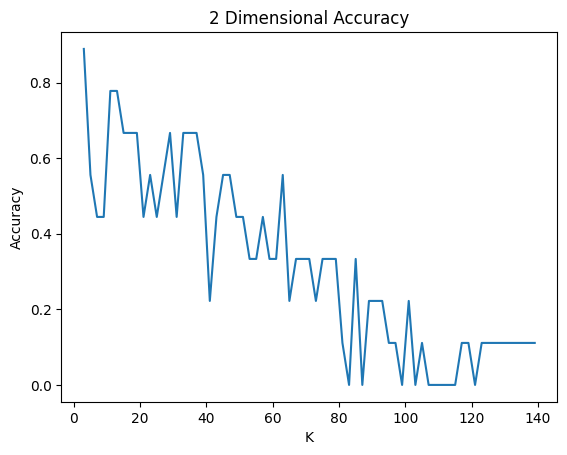

In [96]:
#Accuracy + plots
plotting_df = pd.DataFrame()
for k in range(0,69):
  k_accuracy = plot_df.Accuracy[k] + plot_df_2.Accuracy[k] + plot_df_3.Accuracy[k] + plot_df_4.Accuracy[k] + plot_df_5.Accuracy[k] + plot_df_6.Accuracy[k] + plot_df_7.Accuracy[k] + plot_df_8.Accuracy[k] + plot_df_9.Accuracy[k]
  k_accuracy = k_accuracy/9
  k_valu = plot_df.K[k]
  new_row = pd.DataFrame({'K' : [k_valu], 'Accuracy': [k_accuracy]})
  plotting_df = pd.concat([plotting_df, new_row], ignore_index = True)

plt.plot(plotting_df['K'],plotting_df['Accuracy'])
plt.title("2 Dimensional Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()


##4 Dimensions

In [60]:
'''
two_dim_df = df.drop(columns = ['PetalLengthCm' , 'PetalWidthCm'])
two_dim_test = Test.drop(columns = ['PetalLengthCm', 'PetalWidthCm'])
'''

print(df.head())
print(Test.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1            5.1           3.5            1.4           0.2   
1   2            4.9           3.0            1.4           0.2   
2   3            4.7           3.2            1.3           0.2   
3  51            7.0           3.2            4.7           1.4   
4  52            6.4           3.2            4.5           1.5   

           Species  
0      Iris-setosa  
1      Iris-setosa  
2      Iris-setosa  
3  Iris-versicolor  
4  Iris-versicolor  


In [103]:
test_1 = Test.iloc[[0]]
ground_truth = test_1.Species
predict_test_case_1 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_1.SepalLengthCm)**2 + (row.SepalWidthCm - test_1.SepalWidthCm)**2 + (row.PetalLengthCm - test_1.PetalLengthCm)**2 + (row.PetalWidthCm - test_1.PetalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_1 = pd.concat([predict_test_case_1, new_row], ignore_index=True)

print(predict_test_case_1.head())
print(predict_test_case_1.info())
#the distance is in object type so convert to float
predict_test_case_1['Distance'] = predict_test_case_1['Distance'].astype(float)
print(predict_test_case_1.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_1 = predict_test_case_1.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df = pd.DataFrame()

def pred(k, plot_df):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_1.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_1.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_1.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth[0] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df = pd.concat([plot_df, new_row_1], ignore_index = True)
  return plot_df


#comparing the predicted class against ground truth of the test

for i in range(3,132,2):
  plot_df = pred(i,plot_df)
print("******************************************************")
print(plot_df.head())
print("******************************************************")


   Id                      Distance      Species
0   7  0    0.331662
dtype: float64  Iris-setosa
1   8       0    0.5
dtype: float64  Iris-setosa
2   9       0    0.3
dtype: float64  Iris-setosa
3  10  0    0.316228
dtype: float64  Iris-setosa
4  11       0    1.0
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        132 non-null    int64 
 1   Distance  132 non-null    object
 2   Species   132 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        132 non-null    int64  
 1   Distance  132 non-null    float64
 2   Species   132 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+

In [104]:
test_2 = Test.iloc[[1]]
ground_truth = test_2.Species
predict_test_case_2 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_2.SepalLengthCm)**2 + (row.SepalWidthCm - test_2.SepalWidthCm)**2 + (row.PetalLengthCm - test_2.PetalLengthCm)**2 + (row.PetalWidthCm - test_2.PetalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_2 = pd.concat([predict_test_case_2, new_row], ignore_index=True)

print(predict_test_case_2.head())
print(predict_test_case_2.info())
#the distance is in object type so convert to float
predict_test_case_2['Distance'] = predict_test_case_2['Distance'].astype(float)
print(predict_test_case_2.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_2 = predict_test_case_2.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_2 = pd.DataFrame()

def pred(k, plot_df_2):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_2.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_2.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_2.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth[1] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_2 = pd.concat([plot_df_2, new_row_1], ignore_index = True)
  return plot_df_2


#comparing the predicted class against ground truth of the test


for i in range(3,132,2):
  plot_df_2 = pred(i,plot_df_2)
print("******************************************************")
print(plot_df_2.head())
print("******************************************************")

   Id                      Distance      Species
0   7  1    0.458258
dtype: float64  Iris-setosa
1   8  1    0.223607
dtype: float64  Iris-setosa
2   9  1    0.921954
dtype: float64  Iris-setosa
3  10   1    0.52915
dtype: float64  Iris-setosa
4  11  1    0.424264
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        132 non-null    int64 
 1   Distance  132 non-null    object
 2   Species   132 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        132 non-null    int64  
 1   Distance  132 non-null    float64
 2   Species   132 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+

In [105]:
test_3 = Test.iloc[[2]]
ground_truth = test_3.Species
predict_test_case_3 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_3.SepalLengthCm)**2 + (row.SepalWidthCm - test_3.SepalWidthCm)**2 + (row.PetalLengthCm - test_3.PetalLengthCm)**2 + (row.PetalWidthCm - test_3.PetalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_3 = pd.concat([predict_test_case_3, new_row], ignore_index=True)

print(predict_test_case_3.head())
print(predict_test_case_3.info())
#the distance is in object type so convert to float
predict_test_case_3['Distance'] = predict_test_case_3['Distance'].astype(float)
print(predict_test_case_3.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_3 = predict_test_case_3.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_3 = pd.DataFrame()

def pred(k, plot_df_3):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_3.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_3.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_3.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth[2] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_3 = pd.concat([plot_df_3, new_row_1], ignore_index = True)
  return plot_df_3


#comparing the predicted class against ground truth of the test


for i in range(3,132,2):
  plot_df_3 = pred(i,plot_df_3)
print("******************************************************")
print(plot_df_3.head())
print("******************************************************")

   Id                      Distance      Species
0   7  2    0.994987
dtype: float64  Iris-setosa
1   8       2    0.7
dtype: float64  Iris-setosa
2   9  2    1.459452
dtype: float64  Iris-setosa
3  10   2    1.00995
dtype: float64  Iris-setosa
4  11   2    0.34641
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        132 non-null    int64 
 1   Distance  132 non-null    object
 2   Species   132 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        132 non-null    int64  
 1   Distance  132 non-null    float64
 2   Species   132 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+

In [106]:
test_4 = Test.iloc[[3]]
ground_truth = test_4.Species
predict_test_case_4 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_4.SepalLengthCm)**2 + (row.SepalWidthCm - test_4.SepalWidthCm)**2 + (row.PetalLengthCm - test_4.PetalLengthCm)**2 + (row.PetalWidthCm - test_4.PetalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_4 = pd.concat([predict_test_case_4, new_row], ignore_index=True)

print(predict_test_case_4.head())
print(predict_test_case_4.info())
#the distance is in object type so convert to float
predict_test_case_4['Distance'] = predict_test_case_4['Distance'].astype(float)
print(predict_test_case_4.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_4 = predict_test_case_4.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_4 = pd.DataFrame()

def pred(k, plot_df_4):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_4.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_4.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_4.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth[3] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_4 = pd.concat([plot_df_4, new_row_1], ignore_index = True)
  return plot_df_4


#comparing the predicted class against ground truth of the test


for i in range(3,132,2):
  plot_df_4 = pred(i,plot_df_4)
print("******************************************************")
print(plot_df_4.head())
print("******************************************************")

   Id                      Distance      Species
0   7  3    3.127299
dtype: float64  Iris-setosa
1   8  3    2.986637
dtype: float64  Iris-setosa
2   9  3    3.088689
dtype: float64  Iris-setosa
3  10  3    2.947881
dtype: float64  Iris-setosa
4  11  3    3.070831
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        132 non-null    int64 
 1   Distance  132 non-null    object
 2   Species   132 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        132 non-null    int64  
 1   Distance  132 non-null    float64
 2   Species   132 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+

In [107]:
test_5 = Test.iloc[[4]]
ground_truth = test_5.Species
predict_test_case_5 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_5.SepalLengthCm)**2 + (row.SepalWidthCm - test_5.SepalWidthCm)**2 + (row.PetalLengthCm - test_5.PetalLengthCm)**2 + (row.PetalWidthCm - test_5.PetalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_5 = pd.concat([predict_test_case_5, new_row], ignore_index=True)

print(predict_test_case_5.head())
print(predict_test_case_5.info())
#the distance is in object type so convert to float
predict_test_case_5['Distance'] = predict_test_case_5['Distance'].astype(float)
print(predict_test_case_5.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_5 = predict_test_case_5.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_5 = pd.DataFrame()

def pred(k, plot_df_5):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_5.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_5.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_5.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth[4] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_5 = pd.concat([plot_df_5, new_row_1], ignore_index = True)
  return plot_df_5


#comparing the predicted class against ground truth of the test


for i in range(3,132,2):
  plot_df_5 = pred(i,plot_df_5)
print("******************************************************")
print(plot_df_5.head())
print("******************************************************")

   Id                      Distance      Species
0   7  4    3.956008
dtype: float64  Iris-setosa
1   8  4    3.729611
dtype: float64  Iris-setosa
2   9  4    4.043513
dtype: float64  Iris-setosa
3  10  4    3.770942
dtype: float64  Iris-setosa
4  11  4    3.649658
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        132 non-null    int64 
 1   Distance  132 non-null    object
 2   Species   132 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        132 non-null    int64  
 1   Distance  132 non-null    float64
 2   Species   132 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+

In [108]:
test_6 = Test.iloc[[5]]
ground_truth = test_6.Species
predict_test_case_5 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_6.SepalLengthCm)**2 + (row.SepalWidthCm - test_6.SepalWidthCm)**2 + (row.PetalLengthCm - test_6.PetalLengthCm)**2 + (row.PetalWidthCm - test_6.PetalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_6 = pd.concat([predict_test_case_6, new_row], ignore_index=True)

print(predict_test_case_6.head())
print(predict_test_case_6.info())
#the distance is in object type so convert to float
predict_test_case_6['Distance'] = predict_test_case_6['Distance'].astype(float)
print(predict_test_case_6.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_6 = predict_test_case_6.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_6 = pd.DataFrame()

def pred(k, plot_df_6):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_6.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_6.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_6.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth[5] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_6 = pd.concat([plot_df_6, new_row_1], ignore_index = True)
  return plot_df_6


#comparing the predicted class against ground truth of the test


for i in range(3,132,2):
  plot_df_6 = pred(i,plot_df_6)
print("******************************************************")
print(plot_df_6.head())
print("******************************************************")

    Id  Distance          Species
0  116       0.0   Iris-virginica
1  111       0.1   Iris-virginica
2  138       0.1   Iris-virginica
3   57  0.141421  Iris-versicolor
4  105  0.223607   Iris-virginica
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        273 non-null    int64 
 1   Distance  273 non-null    object
 2   Species   273 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        273 non-null    int64  
 1   Distance  273 non-null    float64
 2   Species   273 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB
None
******************************************************
    K  Accuracy
0   3     

In [109]:
test_7 = Test.iloc[[6]]
ground_truth = test_7.Species
predict_test_case_7 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_7.SepalLengthCm)**2 + (row.SepalWidthCm - test_7.SepalWidthCm)**2 + (row.PetalLengthCm - test_7.PetalLengthCm)**2 + (row.PetalWidthCm - test_7.PetalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_7 = pd.concat([predict_test_case_7, new_row], ignore_index=True)

print(predict_test_case_7.head())
print(predict_test_case_7.info())
#the distance is in object type so convert to float
predict_test_case_7['Distance'] = predict_test_case_7['Distance'].astype(float)
print(predict_test_case_7.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_7 = predict_test_case_7.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_7 = pd.DataFrame()

def pred(k, plot_df_7):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_7.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_7.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_7.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth[6] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_7 = pd.concat([plot_df_7, new_row_1], ignore_index = True)
  return plot_df_7


#comparing the predicted class against ground truth of the test


for i in range(3,132,2):
  plot_df_7 = pred(i,plot_df_7)
print("******************************************************")
print(plot_df_7.head())
print("******************************************************")

   Id                      Distance      Species
0   7  6    4.798958
dtype: float64  Iris-setosa
1   8  6    4.616276
dtype: float64  Iris-setosa
2   9  6    4.879549
dtype: float64  Iris-setosa
3  10  6    4.658326
dtype: float64  Iris-setosa
4  11  6    4.562894
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        132 non-null    int64 
 1   Distance  132 non-null    object
 2   Species   132 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        132 non-null    int64  
 1   Distance  132 non-null    float64
 2   Species   132 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+

In [110]:
test_8 = Test.iloc[[7]]
ground_truth = test_8.Species
predict_test_case_8 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_8.SepalLengthCm)**2 + (row.SepalWidthCm - test_8.SepalWidthCm)**2 + (row.PetalLengthCm - test_8.PetalLengthCm)**2 + (row.PetalWidthCm - test_8.PetalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_8 = pd.concat([predict_test_case_8, new_row], ignore_index=True)

print(predict_test_case_8.head())
print(predict_test_case_8.info())
#the distance is in object type so convert to float
predict_test_case_8['Distance'] = predict_test_case_8['Distance'].astype(float)
print(predict_test_case_8.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_8 = predict_test_case_8.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_8 = pd.DataFrame()

def pred(k, plot_df_8):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_8.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_8.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_8.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth[7] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_8 = pd.concat([plot_df_8, new_row_1], ignore_index = True)
  return plot_df_8


#comparing the predicted class against ground truth of the test


for i in range(3,132,2):
  plot_df_8 = pred(i,plot_df_8)
print("******************************************************")
print(plot_df_8.head())
print("******************************************************")

   Id                      Distance      Species
0   7  7    5.171073
dtype: float64  Iris-setosa
1   8   7    4.98999
dtype: float64  Iris-setosa
2   9  7    5.270674
dtype: float64  Iris-setosa
3  10  7    5.046781
dtype: float64  Iris-setosa
4  11  7    4.918333
dtype: float64  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        132 non-null    int64 
 1   Distance  132 non-null    object
 2   Species   132 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        132 non-null    int64  
 1   Distance  132 non-null    float64
 2   Species   132 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+

In [111]:
test_9 = Test.iloc[[8]]
ground_truth = test_9.Species
predict_test_case_9 = pd.DataFrame()

#Computing this distance of this test case from all the other data points in training set
for ind,row in df.iterrows():
  Dist = np.sqrt((row.SepalLengthCm - test_9.SepalLengthCm)**2 + (row.SepalWidthCm - test_9.SepalWidthCm)**2 + (row.PetalLengthCm - test_9.PetalLengthCm)**2 + (row.PetalWidthCm - test_9.PetalWidthCm)**2)
  new_row = pd.DataFrame({'Id' : [row.Id], 'Distance' : [Dist], 'Species':[row.Species]})
  predict_test_case_9 = pd.concat([predict_test_case_8, new_row], ignore_index=True)

print(predict_test_case_9.head())
print(predict_test_case_9.info())
#the distance is in object type so convert to float
predict_test_case_9['Distance'] = predict_test_case_9['Distance'].astype(float)
print(predict_test_case_9.info())

#sort the prediction dataframe in shortest to longest distance fashion
predict_test_case_9 = predict_test_case_9.sort_values('Distance')

#now we can choose a k value (preferably an odd number) for predicting the class of the test case
#k = int(input("Enter the k value"))
#k in one axis, accuracy in the other
#1 for correct prediction, 0 for incorrect prediction
#add predicted value to test case and compare with its ground truth

plot_df_9 = pd.DataFrame()

def pred(k, plot_df_9):
  class_seto = 0
  class_versi = 0
  class_virgi = 0

  for i in range(0,k):
    if predict_test_case_9.iloc[k].Species == 'Iris-setosa':
      class_seto = class_seto + 1
    elif predict_test_case_9.iloc[k].Species == 'Iris-versicolor':
      class_versi = class_versi + 1
    elif predict_test_case_9.iloc[k].Species == 'Iris-virginica':
      class_virgi = class_virgi + 1
  if(class_seto > class_versi) and (class_seto > class_virgi):
    predicted_class = 'Iris-setosa'
  elif (class_versi > class_seto) and (class_versi > class_virgi):
    predicted_class = 'Iris-versicolor'
  elif (class_virgi > class_seto) and (class_virgi > class_versi):
    predicted_class = 'Iris-virginica'
  if ground_truth[8] == predicted_class:
    final_pred_accuracy = 1
  else:
    final_pred_accuracy = 0

  new_row_1 = pd.DataFrame({'K': [k], 'Accuracy': [final_pred_accuracy]})
  #print(new_row_1)
  plot_df_9 = pd.concat([plot_df_9, new_row_1], ignore_index = True)
  return plot_df_9


#comparing the predicted class against ground truth of the test


for i in range(3,132,2):
  plot_df_9 = pred(i,plot_df_9)
print("******************************************************")
print(plot_df_9.head())
print("******************************************************")

    Id  Distance         Species
0  133       0.3  Iris-virginica
1  129  0.316228  Iris-virginica
2  141  0.360555  Iris-virginica
3  125  0.387298  Iris-virginica
4  144  0.387298  Iris-virginica
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        133 non-null    int64 
 1   Distance  133 non-null    object
 2   Species   133 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        133 non-null    int64  
 1   Distance  133 non-null    float64
 2   Species   133 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB
None
******************************************************
    K  Accuracy
0   3         1


Accuracy plot for 4-dimensions

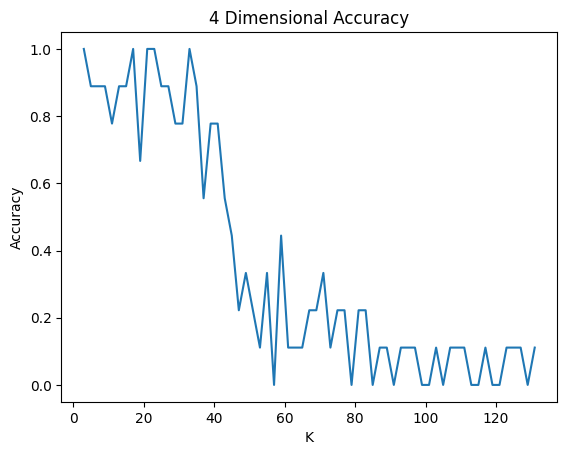

In [114]:
plotting_df = pd.DataFrame()
for k in range(0,65):
  k_accuracy = plot_df.Accuracy[k] + plot_df_2.Accuracy[k] + plot_df_3.Accuracy[k] + plot_df_4.Accuracy[k] + plot_df_5.Accuracy[k] + plot_df_6.Accuracy[k] + plot_df_7.Accuracy[k] + plot_df_8.Accuracy[k] + plot_df_9.Accuracy[k]
  k_accuracy = k_accuracy/9
  k_valu = plot_df.K[k]
  new_row = pd.DataFrame({'K' : [k_valu], 'Accuracy': [k_accuracy]})
  plotting_df = pd.concat([plotting_df, new_row], ignore_index = True)


plt.plot(plotting_df['K'],plotting_df['Accuracy'])
plt.title("4 Dimensional Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()


# Question 2

For the same IRIS dataset, your next task is to perform correlation analysis to understand the relationships between these attributes.


Load the Iris dataset into Python and explore its structure, ensuring it contains relevant numerical attributes for correlation analysis.


Calculate the correlation coefficient between each pair of attributes in the Iris dataset.


Visualize the correlation matrix using a heatmap to better understand the strength and direction of the correlations among the iris flower attributes.


Identify highly correlated attribute pairs, both positively and negatively correlated, and discuss their implications in the context of iris flower characteristics.


Based on the correlation analysis, draw insights into which attributes might have a strong influence on the characteristics of iris flowers.


Your Python code should include functions to calculate correlation coefficients, create the correlation matrix, and generate the heatmap. Ensure to provide clear explanations and insights based on your correlation analysis.




In [84]:
def correlation_coefficient():
  S_Len_S_Wid = np.corrcoef(df.SepalLengthCm, df.SepalWidthCm)
  print("Correlation Coefficient between Sepal Length and Sepal Width: ", S_Len_S_Wid)

  S_Len_P_Len = np.corrcoef(df.SepalLengthCm, df.PetalLengthCm)
  print("Correlation Coefficient between Sepal Length and Petal Length: ", S_Len_P_Len)

  S_Len_P_Wid = np.corrcoef(df.SepalLengthCm, df.PetalWidthCm)
  print("Correlation Coefficient between Sepal Length and Petal Width: ", S_Len_P_Wid)

  S_Wid_P_Len = np.corrcoef(df.SepalWidthCm, df.PetalLengthCm)
  print("Correlation Coefficient between Sepal Width and Petal Length: ", S_Wid_P_Len)

  S_Wid_P_Wid = np.corrcoef(df.SepalWidthCm, df.PetalWidthCm)
  print("Correlation Coefficient between Sepal Width and Petal Width: ", S_Wid_P_Wid)

  P_Len_P_Wid = np.corrcoef(df.PetalWidthCm, df.PetalLengthCm)
  print("Correlation Coefficient between Petal Length and Petal Width: ", P_Len_P_Wid)


In [85]:
def correlation_matrix():
  print(df.corr())


In [86]:
def heatmap_generator():
  sns.heatmap(df.corr(), annot = True, cmap = "Blues")

In [87]:
print("Correlation Coefficients: ")
correlation_coefficient()
print()
print()
print("Correlation matrix: ")
correlation_matrix()

Correlation Coefficients: 
Correlation Coefficient between Sepal Length and Sepal Width:  [[ 1.         -0.10082361]
 [-0.10082361  1.        ]]
Correlation Coefficient between Sepal Length and Petal Length:  [[1.         0.86946301]
 [0.86946301 1.        ]]
Correlation Coefficient between Sepal Length and Petal Width:  [[1.         0.81666515]
 [0.81666515 1.        ]]
Correlation Coefficient between Sepal Width and Petal Length:  [[ 1.         -0.41954564]
 [-0.41954564  1.        ]]
Correlation Coefficient between Sepal Width and Petal Width:  [[ 1.         -0.35115883]
 [-0.35115883  1.        ]]
Correlation Coefficient between Petal Length and Petal Width:  [[1.         0.95996041]
 [0.95996041 1.        ]]


Correlation matrix: 
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.737233     -0.392766       0.899756   
SepalLengthCm  0.737233       1.000000     -0.100824       0.869463   
SepalWidthCm  -0.392766      -0.100824   

<ipython-input-85-463d020f9ee7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


Heatmap: 


<ipython-input-86-52c3e8996e70>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "Blues")


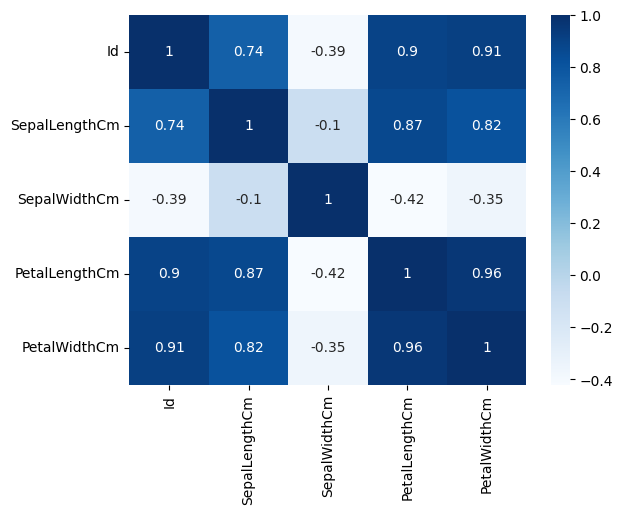

In [88]:
print("Heatmap: ")
heatmap_generator()

Highly correlated features are Petal Length and Petal Width since they have correlation = 0.96



1.   Sepal Length vs Sepal Width: these two features may not have a strong correlation at all since they have the lowest correlation value (-0.11)
2.   Sepal Length vs Petal Length: There is a positive correlation between sepal length and petal length, as the correlation value is 0.87
3. Sepal Length vs Petal Length: There is a positive correlation between sepal length and petal width. (0.82)
4. Sepal Width vs. Petal Length: Sepal width and petal length do not have a strong correlation (-0.43)
5. Sepal Width vs Petal Width: do not have a strong correlation (-0.36)



